In [1]:
#Bootstrap 
import sys 
import os
import sklearn
assert sklearn.__version__ >= '0.20'
import numpy as np
import pandas as pd

In [2]:
# output.to_csv('sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

# Read in Data

In [3]:
def read_data_from_path_file_folder_to_csv(path=None,file_names=None):
    #works
    #determines if the path is a file
    if (os.path.isfile(path)):
        data = pd.read_csv(path, header=0)
        print("Single File: "+ path)
    #if a single path   
    elif (bool(os.path.isfile(path)) == False):
        print("Multiple Files: " + path)
        li = [] # for the files 
        for file in file_names:
            file = join(path, file)
            df = pd.read_csv(file, index_col=None, header=0)
            li.append(df)
        data = pd.concat(li, axis=0)
    return data


In [4]:
from sklearn.model_selection import cross_val_score

def display_scores(model, x, y):
    scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error')
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard_deviation: ", scores.std())


In [5]:
from os import listdir
from os.path import isfile, join

def read_list_of_paths_to_csv(listed_paths=None):
    
    li = [] #list for the aggergated files

    #go through the paths
    for path in listed_paths:
        #read all file names following the paths
        for file in listdir(path):
            try: #for non-csv files
                file = join(path, file)
                df = pd.read_csv(file, index_col=None, header=0)
                li.append(df)
            except:
                continue
    data = pd.concat(li, axis=0)


    return data
        
# combine_files = [f for f in listdir(path) if isfile(join(path, f))]
multi_path = ['new_england_datasets/', 'new_england_datasets/ct_towns/',
             'new_england_datasets/ri_towns/', 'new_england_datasets/ma_towns/']
data = read_list_of_paths_to_csv(multi_path)

In [6]:
def read_directory(path=None):
#     path = 'new_england_datasets/' 
    files = combine_files = [f for f in listdir(path) if isfile(join(path, f))]
    return files

In [7]:
def compare_scores(model, x, y):
    print('Predictions: ', model.predict(x))
    print('actual:', list(y))
    #maybe print a difference?


In [8]:
path = ['new_england_datasets/', 'new_england_datasets/ct_towns/', 
        'new_england_datasets/ri_towns/']
# combine_files = [f for f in listdir(path) if isfile(join(path, f))]S

initial_data = read_list_of_paths_to_csv(path)


#if I could parse the addresses, I could set the different types of roads as a param
data  = initial_data.drop( ["STATUS", "SOLD DATE", "ADDRESS", "ZIP OR POSTAL CODE",
            "URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)",
             "SOURCE", "FAVORITE","NEXT OPEN HOUSE START TIME", "NEXT OPEN HOUSE END TIME", 
          "INTERESTED", "LOCATION", "HOA/MONTH", "$/SQUARE FEET",
                ], axis=1)

#drop the duplicates
data = data.drop_duplicates(subset=['MLS#'])
#use the MLS# as the index 
data = data.set_index(data['MLS#'])
data = data.drop(columns=['MLS#'])
data.count()

SALE TYPE            24191
PROPERTY TYPE        24191
CITY                 24186
STATE OR PROVINCE    24190
PRICE                24191
BEDS                 20500
BATHS                20335
SQUARE FEET          20504
LOT SIZE             20203
YEAR BUILT           20380
DAYS ON MARKET       24116
LATITUDE             24191
LONGITUDE            24191
dtype: int64

In [9]:
initial_data['LOCATION'].unique()

array(['Ferrisburgh', 'Bridport', 'New Haven', ..., 'Centredale',
       'Fatima Area/Fruit Hill', 'lymansville/ fruit hill'], dtype=object)

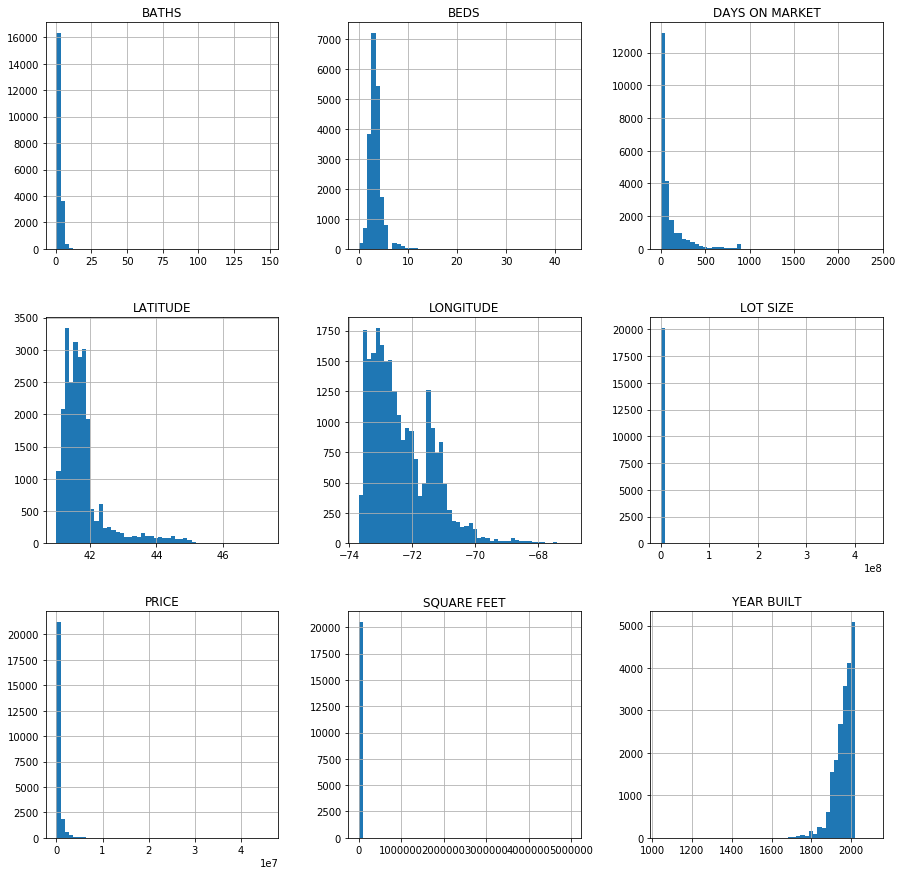

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(15,15))
plt.show()

I wonder if there is any correlation between days on market and home price? More expensive homes take longer to sell typically since there is a smaller group of people that can afford them.

In [11]:
#get the z score on only numerical attributes

- Maybe drop the outliers?
- 1/2 bath only?, 27sqft, no bedroom(studio?), 2.00ft lot size,

In [12]:
data.count()

SALE TYPE            24191
PROPERTY TYPE        24191
CITY                 24186
STATE OR PROVINCE    24190
PRICE                24191
BEDS                 20500
BATHS                20335
SQUARE FEET          20504
LOT SIZE             20203
YEAR BUILT           20380
DAYS ON MARKET       24116
LATITUDE             24191
LONGITUDE            24191
dtype: int64

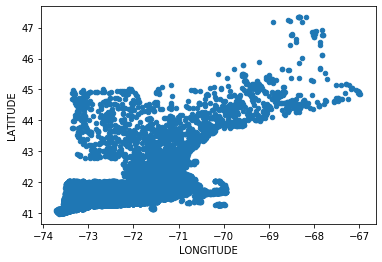

In [13]:
data.plot(kind='scatter', x='LONGITUDE', y='LATITUDE')

# Cleaning

In [14]:
# Figure a better way to do this 
# data[data['PROPERTY TYPE'] == 'Vacant Land']


#get the indexes of the property types wished to be dropped
drop_vacant = data[data['PROPERTY TYPE'] == 'Vacant Land'].index
drop_parking = data[data['PROPERTY TYPE'] == 'Parking'].index
#drop these weird cities
drop_city_bath = data[data['CITY'] == 'Bath'].index 
drop_city_6 = data[data['CITY'] == 6.0].index
drop_t3_city = data[data['CITY'] == 'T3 R12 WELS'].index
drop_redfin_data = data[data['SALE TYPE'] == 'Redfin Data'].index

data = data.drop(list(drop_vacant))
data = data.drop(list(drop_parking))
data = data.drop(list(drop_city_bath))
data = data.drop(list(drop_city_6))
data = data.drop(list(drop_t3_city))
data = data.drop(list(drop_redfin_data))
#could also set all nulls in vacant land to 0, but take the median value prior 



data.count()

SALE TYPE            20490
PROPERTY TYPE        20490
CITY                 20485
STATE OR PROVINCE    20489
PRICE                20490
BEDS                 20481
BATHS                20322
SQUARE FEET          20465
LOT SIZE             16513
YEAR BUILT           20365
DAYS ON MARKET       20415
LATITUDE             20490
LONGITUDE            20490
dtype: int64

In [15]:
# #well thats a skewy entry, need to drop more mis-entered numbers
# data.loc[data['BATHS'].idxmax()]
# #drop this mf
# #drop this weird entry, should make conditional after, only run once
# data = data.drop([(data['BATHS'].idxmax())])
# #drop this incorrectly entered prop
# data = data.drop([(data['SQUARE FEET'].idxmax())])
# #should create a conditional seems like there are quite a few properties that are listed incorrectly
# data = data.drop([data['SQUARE FEET'].idxmax()])
# #i need a better way 
# data = data.drop([(data['SQUARE FEET'].idxmin())])
# data = data.drop([(data['SQUARE FEET'].idxmin())])
# data = data.drop([(data['SQUARE FEET'].idxmin())])

In [16]:
#remove categories that are less than 30 from property history, nvm removes too many 
# data = data.groupby('PROPERTY TYPE').filter(lambda x: len(x) > 30)

#replace null values of 'days on market' with median
data = data.fillna(data["DAYS ON MARKET"].median())

#fill the lot size with median as well
data = data.fillna(data['LOT SIZE'].median())
data = data.fillna(data['SQUARE FEET'].median())
#should I do this after I drop low counts?
data = data.fillna(data['BEDS'].median())
data = data.fillna(data['BATHS'].median())
#need to drop rows that have one entry for city and property type
data = data.groupby(['CITY', 'PROPERTY TYPE']).filter(lambda x: len(x)>20)

#120sq minimum, drop all others
data = data[~(data['SQUARE FEET'] < 120)]
#No entries without a full bathroom
data = data[~(data['BATHS'] < 1)]
#Needs a minimum of 1 bedroom
data = data[~(data['BEDS'] <= 0)]

data.count()

SALE TYPE            15173
PROPERTY TYPE        15173
CITY                 15173
STATE OR PROVINCE    15173
PRICE                15173
BEDS                 15173
BATHS                15173
SQUARE FEET          15173
LOT SIZE             15173
YEAR BUILT           15173
DAYS ON MARKET       15173
LATITUDE             15173
LONGITUDE            15173
dtype: int64

In [17]:
from scipy import stats
only_numbers = data.drop(["PROPERTY TYPE", 'CITY', "STATE OR PROVINCE", 'SALE TYPE'], axis=1)

z = np.abs(stats.zscore(only_numbers))
print(np.where(z > 3)) # first row list of score, second column number 
data = data[(z < 3).all(axis=1)] # 3 stdevs remove
data.count()

(array([    0,     1,     2, ..., 15093, 15094, 15147]), array([7, 7, 7, ..., 6, 6, 6]))


SALE TYPE            13904
PROPERTY TYPE        13904
CITY                 13904
STATE OR PROVINCE    13904
PRICE                13904
BEDS                 13904
BATHS                13904
SQUARE FEET          13904
LOT SIZE             13904
YEAR BUILT           13904
DAYS ON MARKET       13904
LATITUDE             13904
LONGITUDE            13904
dtype: int64

In [18]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR) #inter quartile range

PRICE             360100.000000
BEDS                   1.000000
BATHS                  1.500000
SQUARE FEET         1560.000000
LOT SIZE           42689.000000
YEAR BUILT            56.000000
DAYS ON MARKET        90.000000
LATITUDE               0.445670
LONGITUDE              1.035793
dtype: float64


In [19]:
#median numbers to fill later, based on columns
median_values = data.median().values
data.describe()
#should I use clustering for latitude, longitude?

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,LATITUDE,LONGITUDE
count,1.390400e+04,13904.000000,13904.000000,13904.000000,1.390400e+04,13904.000000,13904.000000,13904.000000,13904.000000
mean,5.281527e+05,3.353927,2.409253,2362.431890,5.759064e+04,1963.069117,76.655854,41.533589,-72.616989
std,5.067810e+05,1.088322,1.063562,1281.337101,2.131024e+05,47.383755,94.774845,0.295059,0.739530
min,1.490000e+04,1.000000,1.000000,273.000000,1.000000e+00,1686.000000,1.000000,41.000596,-73.704778
25%,2.399000e+05,3.000000,1.500000,1428.000000,5.227000e+03,1942.000000,8.000000,41.304637,-73.212116
50%,3.699000e+05,3.000000,2.500000,2044.000000,1.611700e+04,1971.000000,43.000000,41.521694,-72.791495
75%,6.000000e+05,4.000000,3.000000,2988.000000,4.791600e+04,1998.000000,98.000000,41.750307,-72.176324
max,3.800000e+06,7.000000,6.500000,7600.000000,6.141960e+06,2021.000000,492.000000,42.679517,-70.243693


In [20]:
#check for null values
data[data.isnull().any(axis=1)].head()

,SALE TYPE,PROPERTY TYPE,CITY,STATE OR PROVINCE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,LATITUDE,LONGITUDE
MLS#,,,,,,,,,,,,,


In [21]:
#170291934, 170271291, 170284312, 108829,G10219151
#could set threshold for minimum square footage
data.loc[data['SQUARE FEET'].idxmax()], data.loc[data['SQUARE FEET'].idxmin()] 

(SALE TYPE                          MLS Listing
 PROPERTY TYPE        Single Family Residential
 CITY                                  Trumbull
 STATE OR PROVINCE                           CT
 PRICE                                  1199000
 BEDS                                         5
 BATHS                                        6
 SQUARE FEET                               7600
 LOT SIZE                                 34848
 YEAR BUILT                                2004
 DAYS ON MARKET                             401
 LATITUDE                               41.2779
 LONGITUDE                             -73.2617
 Name: 170179786, dtype: object, SALE TYPE                          MLS Listing
 PROPERTY TYPE        Single Family Residential
 CITY                                 Southbury
 STATE OR PROVINCE                           CT
 PRICE                                   125000
 BEDS                                         1
 BATHS                                        1
 SQUARE 

In [22]:
#double check
data['PROPERTY TYPE'].unique(), data['BEDS'].unique(), data['BATHS'].unique()


(array(['Single Family Residential', 'Multi-Family (2-4 Unit)',
        'Condo/Co-op'], dtype=object),
 array([3., 4., 5., 2., 1., 6., 7.]),
 array([2.  , 3.5 , 2.5 , 3.  , 1.  , 4.  , 1.5 , 5.  , 4.5 , 5.5 , 6.5 ,
        6.  , 1.75]))

should make a ratio for filling null values, for example there probably a rule of thumb for average baths to bedrooms and sqaure feet, and could use this ratio for filling null values

In [23]:
#it is possible to stratify here 
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data,
                                       test_size=0.2, 
                                       random_state=42,
                                       stratify=data["PROPERTY TYPE"] + data['CITY'] 
                                       
                                      )
#split for validation set
x_to_split = train_set.drop(["PRICE",
                ], axis=1)
y_to_split = train_set["PRICE"].copy()

#Split on Property History, otherwise the Cats: Townhouse, Parking maybe omitted from a set
#appears that there might not be enough data to split by property and city as well
X_train, X_valid, y_train, y_valid = train_test_split(x_to_split, y_to_split, 
                                                      stratify= x_to_split["PROPERTY TYPE"]
                                                      + x_to_split['CITY'] ,
                                                      random_state=42)

#same for the test set
X_test = test_set.drop(["PRICE"], axis=1)
y_test = test_set["PRICE"].copy()

In [24]:
#count how many unique groups
train_set['CITY'].nunique(), test_set['CITY'].nunique()

(180, 180)

In [25]:
X_train['STATE OR PROVINCE'].nunique(), X_valid['STATE OR PROVINCE'].nunique(), X_test['STATE OR PROVINCE'].nunique()

(3, 3, 3)

In [26]:
#double check 
x_to_split.groupby(['PROPERTY TYPE', 'CITY', 'STATE OR PROVINCE']).filter(lambda x: len(x)> 4).count()

SALE TYPE            11084
PROPERTY TYPE        11084
CITY                 11084
STATE OR PROVINCE    11084
BEDS                 11084
BATHS                11084
SQUARE FEET          11084
LOT SIZE             11084
YEAR BUILT           11084
DAYS ON MARKET       11084
LATITUDE             11084
LONGITUDE            11084
dtype: int64

# Preprocessing

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer



#all columns other than property category
numerical_attributes = list(X_train.drop(["PROPERTY TYPE", 'CITY', "STATE OR PROVINCE", "SALE TYPE"], axis=1))
#Property and Cities
#!!!I should auto list these
categorical_attributes = list(X_train[["PROPERTY TYPE", "CITY", "STATE OR PROVINCE", "SALE TYPE"]])




num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])



categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(sparse=False)),
])

In [28]:
#another option is to prep the data into a simple pipeline, this example utilizes a seperate numerical and categorical
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("numerical_attributes", num_pipeline, numerical_attributes),
    ("categorical_attributes", categorical_pipeline, categorical_attributes),
 
])

x_train_prepared = full_pipeline.fit_transform(X_train)
x_valid_prepared = full_pipeline.fit_transform(X_valid)
x_test_prepared = full_pipeline.fit_transform(X_test)

In [29]:
#check the dimensions are the same
x_train_prepared.shape, x_valid_prepared.shape, x_test_prepared.shape
#not property type,

((8342, 197), (2781, 197), (2781, 197))

# Dimension reduction

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) # preserve 95% of variance
maintain_pca = PCA(n_components=55) #number of dimensions for training set
x_train_rd = pca.fit_transform(x_train_prepared)
x_test_rd = maintain_pca.fit_transform(x_test_prepared)
x_valid_rd = maintain_pca.fit_transform(x_valid_prepared)

In [31]:
some_labels = y_test[:5]
some_data = x_test_prepared[:5]
some_data_rd  = x_test_rd[:5]
some_labels

MLS#
170275788    1949000
170290940     169000
170289142     174900
1248100       290000
170285397     189900
Name: PRICE, dtype: int64

# Linear Regression
  67% best r^2

In [32]:
#try training now
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg_fitted = lin_reg.fit(x_train_prepared, y_train)
#score is the r2
lin_reg.score(x_test_prepared, y_test)

0.67371826218442

In [33]:
lin_reg.score(x_valid_prepared, y_valid)
# better 67% on both validation and test sets

0.6465149272211934

In [34]:
lin_reg.predict(some_data), some_labels

(array([1527808.,  203776.,  233472.,  193536.,  180224.]), MLS#
 170275788    1949000
 170290940     169000
 170289142     174900
 1248100       290000
 170285397     189900
 Name: PRICE, dtype: int64)

In [35]:
import pickle 

pickle.dump(lin_reg_fitted, open('linear_reg.sav', 'wb'))

In [36]:
lin_scores = cross_val_score(lin_reg, x_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores #240-280k

array([282820.77312774, 269433.71082202, 270445.15616029, 280324.53422578,
       300699.98732013, 306016.48790585, 289242.42683953, 265949.63129272,
       266452.59271682, 302307.9494932 ])

In [37]:
#check the mean square error for performance of the linear regression
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(x_train_prepared)
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

277596.25254320685

In [38]:
#the linear regression actually preforms better on this smaller training set
#scoring: explained_variance, max_error, neg_root_mean_squared_error, r2
#neg_mean_absolute_error
np.random.seed(42)
linear_regression_scores = cross_val_score(lin_reg, x_train_prepared, y_train, 
                                           scoring='neg_mean_absolute_error', cv=10)
linear_regression_rmse_scores = np.sqrt(-linear_regression_scores)
display_scores(lin_reg, x_test_prepared, y_test)

Scores:  [-2.57443347e+29 -8.96467971e+10 -6.07817383e+27]
Mean:  -8.78405069438381e+28
Standard_deviation:  1.1995298680689566e+29


/media/tim/Primary Storage/projects/machine_learning/ml_env/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [39]:
# def list_params(model)
#     feature_importances = model.a
#     category_encoder = full_pipeline.named_transformers_["categorical_attributes"]["one_hot"]
#     cat_one_hot_attributes = list(category_encoder.categories_[0])
#     attributes = numerical_attributes + cat_one_hot_attributes
#     sorted(zip(feature_importances, attributes), reverse=True)
# # def display_params():

# Decision Tree

  Pretty good model 

In [40]:
#using a decision tree model rather than the linear regression
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(x_train_prepared, y_train)
decision_tree_reg.score(x_test_prepared, y_test), decision_tree_reg.score(x_valid_prepared, y_valid)
               #fits about 60% of data 

(0.5563657717030945, 0.4866587965658981)

In [41]:
#does well on data around price 200k-300k
decisions_tree_pred = compare_scores(decision_tree_reg, some_data, some_labels)

Predictions:  [1299000.  309900.  169875.   59900.  190000.]
actual: [1949000, 169000, 174900, 290000, 189900]


In [42]:
#fine tune the model by splitting the training/test data into representative groups
scores = cross_val_score(decision_tree_reg, x_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
tree_revised_rmnse_scores = np.sqrt(-scores)
tree_revised_rmnse_scores 

array([341470.04380772, 344632.24441053, 304567.51611909, 306292.79985898,
       343978.88135196, 319639.08603923, 384197.69951516, 323780.93297732,
       343958.67820337, 344586.19055792])

In [43]:
pd.Series(np.sqrt(-scores)).describe()

count        10.000000
mean     335710.407284
std       23368.654895
min      304567.516119
25%      320674.547774
50%      342714.361006
75%      344434.363256
max      384197.699515
dtype: float64

In [44]:
decision_tree_predictions = decision_tree_reg.predict(x_train_prepared)
tree_mse = mean_squared_error(y_train, decision_tree_predictions)
tree_root_rmse = np.sqrt(tree_mse)
tree_root_rmse  #lowest rmse!

882.6513737679679

In [45]:
display_scores(decision_tree_reg, x_test_prepared, y_test)

Scores:  [-1.68381794e+11 -1.30641286e+11 -1.27567524e+11]
Mean:  -142196868121.49442
Standard_deviation:  18558012766.296688


/media/tim/Primary Storage/projects/machine_learning/ml_env/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [46]:
compare_scores(decision_tree_reg, some_data, some_labels)

Predictions:  [1299000.  309900.  169875.   59900.  190000.]
actual: [1949000, 169000, 174900, 290000, 189900]


In [47]:
pickle.dump(decision_tree_reg, open('decision_tree.sav', 'wb'))

# SVR 

In [48]:
#SVR model
from sklearn.svm import SVR 

#i should make a function to call each modules easily with the fit, etc. like below
svm_regression = SVR(kernel='linear')
svm_regression.fit(x_train_prepared, y_train)
housing_predictions = svm_regression.predict(x_train_prepared)
svm_mse = mean_squared_error(y_train, housing_predictions)
#unsure why sometimes it was run 
rmse_svm = np.sqrt(svm_mse)
rmse_svm

526291.9768825828

In [49]:
display_scores(svm_regression, x_test_prepared, y_test)

/media/tim/Primary Storage/projects/machine_learning/ml_env/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Scores:  [-3.59714433e+11 -2.48825751e+11 -2.74536616e+11]
Mean:  -294358933429.5322
Standard_deviation:  47390351831.75455


In [50]:
compare_scores(svm_regression, some_data, some_labels) 

Predictions:  [401102.56771614 366451.60603855 363502.07095135 366152.10054864
 365282.21248295]
actual: [1949000, 169000, 174900, 290000, 189900]


focuses on the average too much, centered around 360k


In [51]:
pickle.dump(svm_regression, open('svm_reg.sav', 'wb'))

# Random Forest Regression
-mediocre

In [52]:
#check multiple types of models at once 

from sklearn.model_selection import GridSearchCV

param_grid = [
    #estimators are the number of 'trees', 'features' are the parameters
    {'n_estimators':[3,10,3], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features': [2,3,4]},
    
]

In [53]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(x_train_prepared, y_train)
forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
random_forest_reg = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                          verbose=2)
random_forest_reg.fit(x_train_prepared, y_train)



Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.1s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.1s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.1s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.1s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.1s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] .

[CV] .. bootstrap=False, max_features=2, n_estimators=3, total=   0.1s
[CV] bootstrap=False, max_features=2, n_estimators=3 .................
[CV] .. bootstrap=False, max_features=2, n_estimators=3, total=   0.1s
[CV] bootstrap=False, max_features=2, n_estimators=10 ................
[CV] . bootstrap=False, max_features=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_features=2, n_estimators=10 ................
[CV] . bootstrap=False, max_features=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_features=2, n_estimators=10 ................
[CV] . bootstrap=False, max_features=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_features=2, n_estimators=10 ................
[CV] . bootstrap=False, max_features=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_features=2, n_estimators=10 ................
[CV] . bootstrap=False, max_features=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_features=3, n_estimators=3 .................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    8.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [54]:
#show the best estimator
random_forest_reg.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [55]:
rndfst_reg = random_forest_reg.best_estimator_
compare_scores(rndfst_reg, some_data, some_labels)

Predictions:  [2138900.  193560.  162560.  199282.  209370.]
actual: [1949000, 169000, 174900, 290000, 189900]


In [56]:
#look at the results of the grid search 
cv_results = random_forest_reg.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(np.sqrt(-mean_score), params)

305160.66596877656 {'max_features': 2, 'n_estimators': 3}
265219.83954464644 {'max_features': 2, 'n_estimators': 10}
305160.66596877656 {'max_features': 2, 'n_estimators': 3}
301577.84223523823 {'max_features': 4, 'n_estimators': 3}
266429.3565012142 {'max_features': 4, 'n_estimators': 10}
301577.84223523823 {'max_features': 4, 'n_estimators': 3}
303644.5953748743 {'max_features': 6, 'n_estimators': 3}
267522.60024235386 {'max_features': 6, 'n_estimators': 10}
303644.5953748743 {'max_features': 6, 'n_estimators': 3}
293585.4264385883 {'max_features': 8, 'n_estimators': 3}
260544.16789215084 {'max_features': 8, 'n_estimators': 10}
293585.4264385883 {'max_features': 8, 'n_estimators': 3}
292159.46417446586 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
254337.61254230377 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
293323.6130381519 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
253199.8175315863 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [57]:
feature_importances = random_forest_reg.best_estimator_.feature_importances_
grid_forest_model = random_forest_reg.best_estimator_
grid_forest_model

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [58]:
#when looking for more combinations try randomcvsearch
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_regression = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(forest_regression, param_distributions=param_distribs,
                                  n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, verbose=2)
random_search.fit(x_train_prepared, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=7, n_estimators=180 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. max_features=7, n_estimators=180, total=   2.1s
[CV] max_features=7, n_estimators=180 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ................. max_features=7, n_estimators=180, total=   2.0s
[CV] max_features=7, n_estimators=180 ................................
[CV] ................. max_features=7, n_estimators=180, total=   2.2s
[CV] max_features=7, n_estimators=180 ................................
[CV] ................. max_features=7, n_estimators=180, total=   2.2s
[CV] max_features=7, n_estimators=180 ................................
[CV] ................. max_features=7, n_estimators=180, total=   2.1s
[CV] max_features=5, n_estimators=15 .................................
[CV] .................. max_features=5, n_estimators=15, total=   0.2s
[CV] max_features=5, n_estimators=15 .................................
[CV] .................. max_features=5, n_estimators=15, total=   0.2s
[CV] max_features=5, n_estimators=15 .................................
[CV] .................. max_features=5, n_estimators=15, total=   0.2s
[CV] max_features=5, n_estimators=15 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.2s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [59]:
# displaying the importance scores next to their columns
category_encoder = full_pipeline.named_transformers_["categorical_attributes"]["one_hot"]

cat_one_hot_attributes = list(category_encoder.categories_[0])

attributes = numerical_attributes + cat_one_hot_attributes
sorted(zip(feature_importances, attributes), reverse=True)

[(0.18892176022625848, 'BATHS'),
 (0.12837117581806282, 'LATITUDE'),
 (0.12042556327987673, 'SQUARE FEET'),
 (0.09652576116719587, 'LONGITUDE'),
 (0.056897839698454515, 'YEAR BUILT'),
 (0.05377831267054237, 'LOT SIZE'),
 (0.0516270082484098, 'BEDS'),
 (0.04708459251903614, 'DAYS ON MARKET'),
 (0.010405345312596589, 'Single Family Residential'),
 (0.004002581312023774, 'Condo/Co-op'),
 (0.0014087534028663603, 'Multi-Family (2-4 Unit)')]

In [60]:
#I should probably remove the $/square feet, as there probably is fairly high correlation between the two
#also latitude seems like an odd predictor of price, as all data is within the town..
# category_encoder.categories_
random_forest_best = random_search.best_estimator_

compare_scores(random_forest_best, some_data, some_labels)

Predictions:  [1957773.88888889  209429.72222222  184056.38888889  212894.98333333
  209804.12222222]
actual: [1949000, 169000, 174900, 290000, 189900]


In [61]:
pickle.dump(random_forest_best, open('random_forest.sav', 'wb'))

In [62]:
final_predictions = random_forest_reg.predict(x_test_prepared)
#dataset still not large enough!
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse #lower, but still about the same

265702.10107087455

In [63]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors))) #still poor

array([239245.35098529, 289753.12778101])

# Neural Networks - Dense

In [64]:
#putting the data into a neural network
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

In [65]:
try:
    saved_model = keras.models.load_model('simple_nn.hdf5')
except:
    pass

In [66]:
#should correct the issue...
y_train = (y_train.astype(np.float32))
y_test = (y_test.astype(np.float32))
y_valid = (y_valid.astype(np.float32))


ValueError: Error when checking input: expected dense_93_input to have shape (16,) but got array with shape (15,)

In [67]:
#okay the valid shape is 15 for some reason
x_valid_prepared.shape

(2781, 197)

In [68]:
tf.random.set_seed(42)
np.random.seed(42)
len(data.columns)

input_shape = x_train_prepared.shape[1:]
input_red = x_train_rd.shape[1:]
#simple nn
model = keras.models.Sequential([
    keras.layers.Dense(200, activation="relu", kernel_initializer="lecun_normal",
                       input_shape=input_red),
    keras.layers.Dropout(rate=.3),
    keras.layers.Dense(200, activation="relu", kernel_initializer="lecun_normal"),
    keras.layers.Dropout(rate=.3),
    keras.layers.Dense(1, kernel_initializer='lecun_normal', activation='relu'),
])

In [69]:
model.compile(loss="mse", optimizer=keras.optimizers.Adamax(), metrics=["mean_absolute_error"])

In [70]:
history = model.fit(x_train_rd, y_train, epochs=100,
             validation_data=(x_valid_rd, y_valid))

Train on 8342 samples, validate on 2781 samples
Epoch 1/100
8342/8342 [==============================] - 1s 96us/sample - loss: 542291718421.9113 - mean_absolute_error: 531654.4375 - val_loss: 506649420857.0730 - val_mean_absolute_error: 520768.3125
Epoch 2/100
8342/8342 [==============================] - 0s 46us/sample - loss: 541831211263.8159 - mean_absolute_error: 531322.8750 - val_loss: 505861639748.6717 - val_mean_absolute_error: 520177.6250
Epoch 3/100
8342/8342 [==============================] - 0s 45us/sample - loss: 540414047585.7722 - mean_absolute_error: 530355.1250 - val_loss: 503902218969.7979 - val_mean_absolute_error: 518751.9062
Epoch 4/100
8342/8342 [==============================] - 0s 45us/sample - loss: 537550720816.7941 - mean_absolute_error: 528433.1875 - val_loss: 500357094696.4114 - val_mean_absolute_error: 516200.6250
Epoch 5/100
8342/8342 [==============================] - 0s 45us/sample - loss: 532539106024.3702 - mean_absolute_error: 525127.6250 - val_loss:

8342/8342 [==============================] - 1s 94us/sample - loss: 103833017662.9106 - mean_absolute_error: 192912.6094 - val_loss: 128525350193.9849 - val_mean_absolute_error: 228082.3594
Epoch 42/100
8342/8342 [==============================] - 1s 89us/sample - loss: 103399772559.6816 - mean_absolute_error: 191432.1094 - val_loss: 128313829236.8155 - val_mean_absolute_error: 227933.8281
Epoch 43/100
8342/8342 [==============================] - 1s 90us/sample - loss: 101777615221.6581 - mean_absolute_error: 190890.0156 - val_loss: 128190389017.1305 - val_mean_absolute_error: 228036.0000
Epoch 44/100
8342/8342 [==============================] - 1s 82us/sample - loss: 102025248532.3155 - mean_absolute_error: 191038.8438 - val_loss: 127984498488.4286 - val_mean_absolute_error: 227758.0469
Epoch 45/100
8342/8342 [==============================] - 1s 91us/sample - loss: 101054318448.8708 - mean_absolute_error: 190534.3906 - val_loss: 127780466919.2377 - val_mean_absolute_error: 227568.578

8342/8342 [==============================] - 1s 100us/sample - loss: 89909218213.4088 - mean_absolute_error: 177432.9219 - val_loss: 122888064115.2506 - val_mean_absolute_error: 221694.9375
Epoch 82/100
8342/8342 [==============================] - 1s 90us/sample - loss: 89818344080.4795 - mean_absolute_error: 177798.6250 - val_loss: 122922733269.0112 - val_mean_absolute_error: 221952.0156
Epoch 83/100
8342/8342 [==============================] - 1s 112us/sample - loss: 90724346628.3577 - mean_absolute_error: 178172.1406 - val_loss: 122798628348.5020 - val_mean_absolute_error: 221704.1250
Epoch 84/100
8342/8342 [==============================] - 1s 78us/sample - loss: 89079680750.9988 - mean_absolute_error: 177142.7812 - val_loss: 122748497126.1330 - val_mean_absolute_error: 221681.6875
Epoch 85/100
8342/8342 [==============================] - 1s 94us/sample - loss: 89773561647.3210 - mean_absolute_error: 177462.5938 - val_loss: 122603351726.7170 - val_mean_absolute_error: 221390.9844
E

In [71]:
model.evaluate(x_test_rd, y_test)

2781/2781 [==============================] - 0s 48us/sample - loss: 142283549602.1057 - mean_absolute_error: 237024.3125


[142283549602.1057, 237024.31]

In [72]:
compare_scores(model, some_data_rd, some_labels)

Predictions:  [[1782004.2 ]
 [ 320620.44]
 [  95259.33]
 [ 245829.83]
 [ 227260.67]]
actual: [1949000, 169000, 174900, 290000, 189900]


In [73]:
some_data_rd = x_test_rd[:5]
compare_scores(model, some_data_rd, some_labels)

Predictions:  [[1782004.2 ]
 [ 320620.44]
 [  95259.33]
 [ 245829.83]
 [ 227260.67]]
actual: [1949000, 169000, 174900, 290000, 189900]


In [74]:
model.save('simple_nn.hdf5')

# Trying more complex models

In [75]:
input_shape = x_train_rd.shape[1:]
input_shape

(55,)

In [76]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [77]:
bs_opt = keras.optimizers
bs_act = keras.activations

In [80]:
#could mess around with losses and metrics?


parameters_distributions = {
    "n_hidden": [0, 1, 2, 3, 4],
    "n_neurons":np.arange(1, 200),
    "learning_rate": reciprocal(1e-4, 9e-2),
    'optimizer':[ # bs_opt.SGD(), bs_opt.RMSprop(), bs_opt.Adagrad(),
#                 bs_opt.Nadam(), bs_opt.Ftrl(), bs_opt.Adadelta(),
                bs_opt.Adam(), bs_opt.Adamax()],
    'input_shape': input_shape, #streamline this
    'activation': [ #bs_act.elu, bs_act.exponential, bs_act.hard_sigmoid,
                  bs_act.linear, bs_act.relu, bs_act.selu, bs_act.sigmoid,
                  bs_act.tanh],
    'drop_out_rate': np.arange(0.0, 1.0, step=0.1),
    'exit_layer_act': [bs_act.linear, bs_act.exponential, bs_act.relu, bs_act.softmax],
    'loss_fn': ['mse', 'mae']
}
#should save a new model each time it is ran
# checkpoint_save = datetime.now().strftime('%Y%m%d_%H%M%S') # to implement 
checkpoint = keras.callbacks.ModelCheckpoint('rndsh_nn.hdf5', monitor='loss', 
                                            save_best_only= True, mode='auto',
                                            save_freq=1)
early_stop = keras.callbacks.EarlyStopping(patience=10, monitor='loss')

In [81]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=None, 
                drop_out_rate=.5, optimizer=None, activation=None,
               exit_layer_act='linear', loss_fn='mse'):
    #should make a call parms for kernel_initializer

    model = keras.models.Sequential()
    #input layer
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    #hidden layers
    for layer in range(n_hidden):   
        model.add(keras.layers.Dense(n_neurons, activation=activation, kernel_initializer='lecun_normal'))
        model.add(keras.layers.Dropout(rate=drop_out_rate))
    #output layer, maybe make different possible activations for output layer
    model.add(keras.layers.Dense(1, activation=exit_layer_act))
    #optimizer 
    optimizer = keras.optimizers.RMSprop()
    #compile, #could use multiple losses too
    model.compile(loss= loss_fn, optimizer=optimizer, metrics=['mean_squared_error', 'accuracy'], )
    return model


keras_regressor = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [82]:
#n_iterations = number of parameter settings that are sampled
#cv = cross folds of the data
rand_search_cv = RandomizedSearchCV(keras_regressor, parameters_distributions, n_iter=10, 
                                   cv=3, verbose=2)

In [90]:
try: 
    #load model otherwise rebuild
    best_nn_model_rand = keras.models.load_model('rndsh_nn.hdf5')
except:
    tf.random.set_seed(42)
    np.random.seed(42)
    rand_search_cv.fit(x_train_rd, y_train, epochs=100, 
                   validation_data=(x_valid_rd, y_valid), 
                   callbacks=[checkpoint, early_stop])

In [87]:
# rand_search_cv.best_params_

In [89]:
#still shitty
# rand_search_cv.best_score_

In [91]:
#the model still sucks...
# best_nn_model_rand = rand_search_cv.best_estimator_.model
best_nn_model_rand.evaluate(x_test_rd, y_test)

2781/2781 [==============================] - 0s 59us/sample - loss: 210607.6290 - mean_squared_error: 172404523008.0000 - accuracy: 0.0000e+00


[210607.62896103022, 172404520000.0, 0.0]

In [92]:
#much better with the dimension reduction
compare_scores(best_nn_model_rand, some_data_rd, some_labels)

Predictions:  [[1694295.  ]
 [ 190250.95]
 [ 160101.38]
 [ 182908.48]
 [ 204232.55]]
actual: [1949000, 169000, 174900, 290000, 189900]


best model still performs quite poorly, need to get more data

In [94]:
# rand_search_cv.best_score_, rand_search_cv.best_estimator_.score

In [95]:
best_nn_model_rand.evaluate(x_test_rd, y_test)

2781/2781 [==============================] - 0s 30us/sample - loss: 210607.6290 - mean_squared_error: 172404523008.0000 - accuracy: 0.0000e+00


[210607.62896103022, 172404520000.0, 0.0]

AttributeError: 'Sequential' object has no attribute 'score'

##### next to try a wide and deep network

# Ensemble learning - Voting Classifier

In [96]:
trained_estimators = [random_forest_reg, decision_tree_reg, svm_regression, lin_reg_fitted, 
             best_nn_model_rand]


In [100]:
#takes  a while to run
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x_train_prepared)
poly_reg = lin_reg.fit(x_poly, y_train)

In [104]:
some_data_poly = poly_features.fit_transform(some_data)
compare_scores(poly_reg, some_data_poly, some_labels)

Predictions:  [2119912.75   290283.375  175157.375  211324.125  188514.125]
actual: [1949000, 169000, 174900, 290000, 189900]


In [105]:
from sklearn.ensemble import VotingRegressor
 
voting_reg = VotingRegressor(estimators=[
    ('linear', lin_reg), ('decision', decision_tree_reg), ('svm', svm_regression),
    ('rnd_fst', random_forest_reg), ('poly_reg', poly_reg) 
])
history = voting_reg.fit(x_train_prepared, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.1s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.1s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.1s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.1s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.1s
[CV] max_features=2, n_estimators=3 ..................................
[CV] .

[CV] .. bootstrap=False, max_features=2, n_estimators=3, total=   0.1s
[CV] bootstrap=False, max_features=2, n_estimators=10 ................
[CV] . bootstrap=False, max_features=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_features=2, n_estimators=10 ................
[CV] . bootstrap=False, max_features=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_features=2, n_estimators=10 ................
[CV] . bootstrap=False, max_features=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_features=2, n_estimators=10 ................
[CV] . bootstrap=False, max_features=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_features=2, n_estimators=10 ................
[CV] . bootstrap=False, max_features=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_features=3, n_estimators=3 .................
[CV] .. bootstrap=False, max_features=3, n_estimators=3, total=   0.1s
[CV] bootstrap=False, max_features=3, n_estimators=3 .................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    8.7s finished


In [107]:
compare_scores(voting_reg, some_data, some_labels)

Predictions:  [1378923.71354323  255492.72120771  232576.21419027  202481.22010973
  225020.04249659]
actual: [1949000, 169000, 174900, 290000, 189900]


In [108]:
history.score(x_test_prepared, y_test) 

0.7011980548442864